In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('debts.csv')

In [4]:
df.shape

(143170, 8)

In [5]:
df.head()

,DebtSum,Overdue,PaidSum,Paid,DOB,Sex,Gender,Age
0,476.67,180,476.67,1,1987,Feminin,0,34
1,1594.20,180,1534.20,1,1969,Feminin,0,52
2,1656.23,1756,1461.23,1,1991,MASCULIN,1,30
3,2643.09,180,0.00,0,1987,Masculin,1,34
4,470.00,180,470.00,1,1963,Feminin,0,58


In [7]:
df.drop(columns = ['DOB', 'Sex', 'PaidSum', 'Paid', 'Gender'], inplace = True)

In [9]:
df = df[
    (df['DebtSum']>1000) & (df['DebtSum'] < 20000) & 
    
    (df['Age']<70) & (df['Age']>18) & 
    
    (df['Overdue'] < 360) & (df['Overdue'] > 0)
]

In [10]:
df.shape

(26284, 3)

In [11]:
df.head()

,DebtSum,Overdue,Age
1,1594.20,180,52
3,2643.09,180,34
23,1453.00,180,40
56,1318.00,180,34
71,1756.00,182,29


In [13]:
df['DebtSum'] = df['DebtSum'].astype(float)
df['Overdue'] = df['Overdue'].astype(int)
df['Age'] = df['Age'].astype(float)

In [14]:
df.dropna(inplace = True)

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()

In [18]:
col = df.columns

In [20]:
df_new = pd.DataFrame(min_max_scaler.fit_transform(df), columns = col)

In [22]:
df_new.head()

,DebtSum,Overdue,Age
0,0.031273,0.500000,0.653061
1,0.086484,0.500000,0.285714
2,0.023841,0.500000,0.408163
3,0.016734,0.500000,0.285714
4,0.039790,0.505587,0.183673


### Elbow Method

In [23]:
distrotions = []

K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_new)
    distrotions.append(kmeanModel.inertia_)

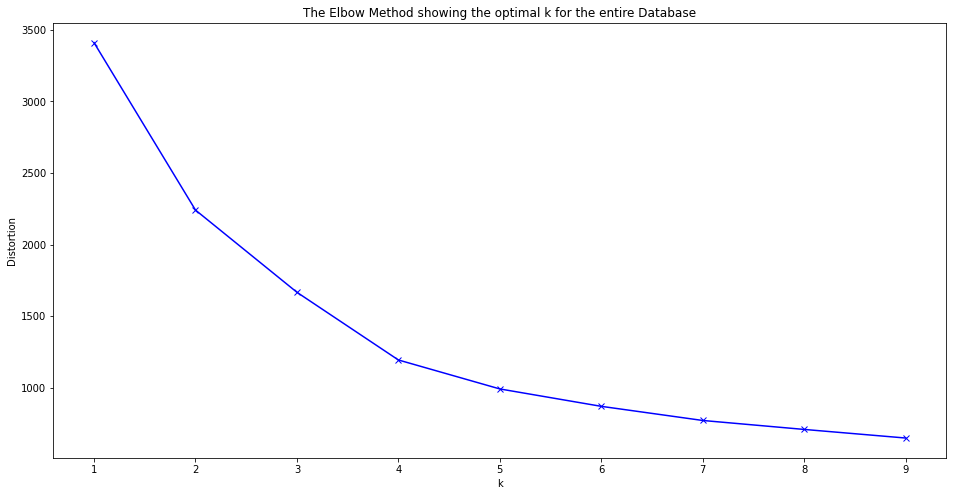

In [24]:
plt.figure(figsize = (16, 8))
plt.plot(K, distrotions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title("The Elbow Method showing the optimal k for the entire Database")
plt.show()

### k-Mean

In [25]:
kmeans_paid = KMeans(n_clusters=5)
y_kmeans = kmeans_paid.fit_predict(df_new)

df_new.assign(Category = y_kmeans)
df['Category'] = y_kmeans

In [28]:
df[df['Category'] == 0].describe()

,DebtSum,Overdue,Age,Category
count,9944.000000,9944.000000,9944.000000,9944.0
mean,3083.131790,99.044147,29.860016,0.0
std,1445.978438,25.489712,4.962042,0.0
min,1000.080000,1.000000,20.000000,0.0
25%,1880.832500,89.000000,26.000000,0.0
50%,2844.220000,99.000000,30.000000,0.0
75%,4143.000000,109.000000,34.000000,0.0
max,6757.800000,201.000000,41.000000,0.0


In [29]:
df[df['Category'] == 1].describe()

,DebtSum,Overdue,Age,Category
count,3398.000000,3398.000000,3398.000000,3398.0
mean,15156.285500,114.470277,42.154208,1.0
std,2642.922968,37.095270,9.122352,0.0
min,9670.000000,6.000000,20.000000,1.0
25%,13007.450000,97.000000,35.000000,1.0
50%,15179.190000,107.000000,41.000000,1.0
75%,17471.250000,120.000000,48.000000,1.0
max,19998.000000,357.000000,69.000000,1.0


In [30]:
df[df['Category'] == 2].describe()

,DebtSum,Overdue,Age,Category
count,4750.000000,4750.000000,4750.000000,4750.0
mean,4085.979728,102.744842,49.953684,2.0
std,2519.797928,36.282840,7.296099,0.0
min,1001.100000,5.000000,40.000000,2.0
25%,1897.737500,87.000000,44.000000,2.0
50%,3499.000000,100.000000,48.000000,2.0
75%,5848.002500,115.000000,55.000000,2.0
max,11993.000000,281.000000,69.000000,2.0


In [31]:
x_axis = df['DebtSum']
y_axis = df['Age']

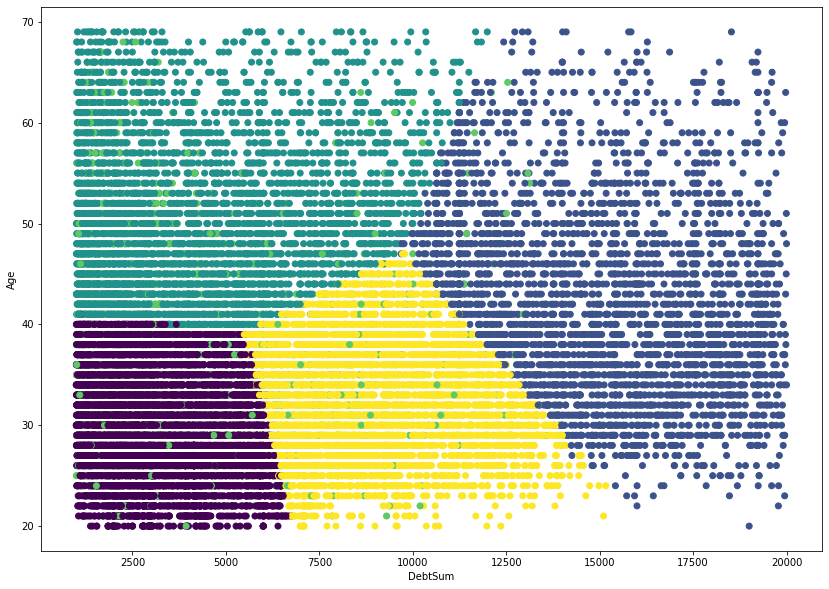

In [32]:
f, ax = plt.subplots(figsize=(14, 10))
plt.xlabel('DebtSum')
plt.ylabel('Age')
plt.scatter(x_axis, y_axis, c = df['Category'])